<div class="frontmatter text-center">
<h1>Geospatial Data Science</h1>
<h2>Exercise 8: Getting started with OSMnx</h2>
<h3>IT University of Copenhagen, Spring 2022</h3>
<h3>Instructors: Anastassia Vybornova & Ane Rahbek Vierø</h3>
</div>

This notebook was adapted from the [example notebooks on OSMnx](https://github.com/gboeing/osmnx-examples/tree/main/notebooks), in particular:
* [02-routing-speed-time.ipynb](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/02-routing-speed-time.ipynb)
* [03-graph-place-queries.ipynb](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/03-graph-place-queries.ipynb)
* [15-advanced-plotting.ipynb](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/15-advanced-plotting.ipynb)

### Working with OSM and OSMnx - useful links

* [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
* [Documentation and install instructions](https://osmnx.readthedocs.io)
* [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
* [Journal article and citation info](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
* [GitHub repo](https://github.com/gboeing/osmnx)
* [NetworkX package](https://networkx.org/)

# It's time to get creative!

The goal of today is to take a quick dive into the usage of [OpenStreetMap](https://www.openstreetmap.org/) data through the [OSMnx package](https://osmnx.readthedocs.io/en/stable/). You will get acquainted with some of OSMnx' main functionalities and have some fun by solving a routing problem between two locations of your own choice. 

# Short Instructions
0. Choose your own location to work on (preferrably a place you know well)
1. Get the corresponding street network data from OSM 
2. Solve a routing problem from A to B
3. Additional challenge: try out routing solutions for attribute-dependent edge weight modifications (the default would be to set edge weight equal to its physical length)
4. Visualize your results on a map
5. Share your results with the group! (On Zoom, through screensharing)

Below, we give you an example outcome for this exercise. Then, for each of the subtasks, you find some helpful comments, functions and links to further information.

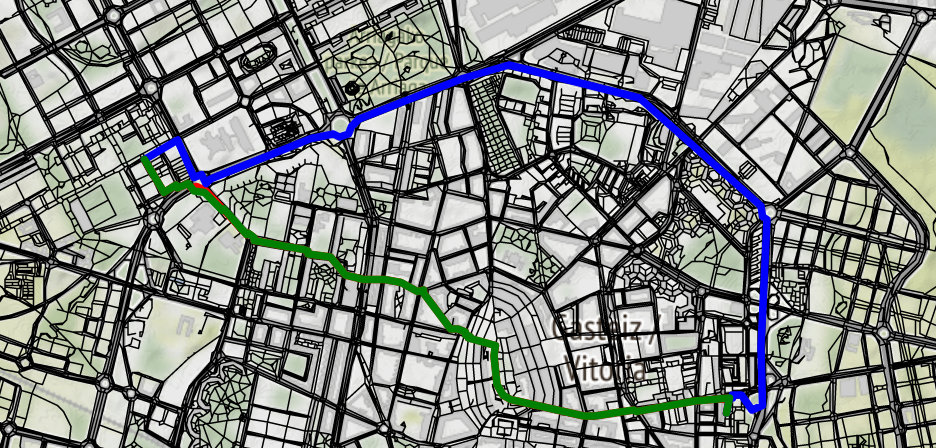

In [1]:
from IPython import display
display.Image("https://user-images.githubusercontent.com/73348979/159659553-5c997cc3-7086-440f-b8de-a03f0c0f4251.png")

# Long instructions

### NetworkX!
OSMnx makes intensive usage of the networkx package. If you have never worked with networkx before, take a minute to get acquainted with the data structure in networkx: graph objects, edges, nodes, and attributes.

`networkx.Graph.nodes`
`networkx.Graph.edges`
`networkx.get_node_attributes`
`networkx.get_edge_attributes`


### Getting data from OSM through OSMnx

There are different ways to do place queries - see Boeing's example notebook ["Graph Place Queries"](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/03-graph-place-queries.ipynb). You will find a description of bounding boxes on the [OpenStreetMap wiki](https://wiki.openstreetmap.org/wiki/Bounding_Box). The [Nominatim tool](https://nominatim.openstreetmap.org/ui/search.html) searches OSM data by name and address (geocoding) and generates synthetic addresses of OSM points (reverse geocoding). Be aware that an OSMnx query for a medium-sized city might take a couple of minutes to run. 

`osmnx.graph_from_place` 

For some of the data processing, it can also be helpful to convert the networkx graph imported by OSMnx into a geodataframe.
 
`osmnx.utils_graph.graph_to_gdfs`

### Attributes and custom filters

OpenStreetMap data is volunteered geographic information. There are, unfortunately, many ways of tagging one and the same piece of infrastructure. The OSMnx package offers a basic functionality to specify the parameter `network_type` when importing the data. However, if you want to do a more detailed analysis, you might need to use a custom filter for import. As an example, [in this notebook](https://github.com/mszell/bikenwgrowth/blob/master/parameters/parameters.py) you can find a dictionary called `osmnxparameters`, with (almost?) all different tag combinations that are used for protected bicycle infrastructure. 

### What do we mean by "simplifying"?
 
A common characteristic of street networks from OSM data is that networks contain a high number of interstitial nodes (which are merely there to represent the geometry - e.g. one curved street is represented by numerous interstitial nodes connected by "straight" edges). The problem is nicely visualized [here](https://notebook.community/kerimlcr/ab2017-dpyo/ornek/osmnx/osmnx-0.3/examples/04-example-simplify-network). OSMnx contains a number of functions to simplify such graphs, i.e. to remove interstitial nodes from the network while retaining the information on the geometry; see Boeing's [example notebook on simplification](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/04-simplify-graph-consolidate-nodes.ipynb). 

**Important: you cannot merge "simplified" networks without loss of information.** if you aim to combine multiple graphs (created for the same place by using different custom filters) that you downloaded and simplified independently from each other, OSMnx cannot do the job anymore. Be aware of this limitation when working on your own project - and let us know if you need further guidance on this topic.  

`osmnx.simplification.simplify_graph`


### MultiDiGraphs - and more simple objects

NetworkX has 3 graph classses: Graph, DiGraph, and MultiDiGraph - see an overview [here](https://networkx.org/documentation/stable/reference/classes/index.html). OSMnx translates data from OSM into a MultiDiGraph object. Be aware that some OSMnx functions do require a MultiDiGraph as input - however, for analysis it can be useful to implement some simplifying assumptions, i.e. remove parallel edges, drop self-loops, convert the directed graph to an undirected one, drop degree-0 nodes, use only the largest connected component, etc.

`osmnx.utils_graph.get_largest_component`
`osmnx.utils_graph.get_digraph`
`osmnx.utils_graph.get_undirected`
`networkx.DiGraph.to_undirected`

### How to define my A and B?

How do you get from your geocoordinates of location A to its OSM ID? In an ideal world (and possibly for your own project), you would be using `osmnx.distance.nearest_nodes`. However, our docker is running an outdated OSMnx version where this function does not work (and its predecessor, ` get_nearest_node`, is deprecated). A possible, neither efficient nor elegant but enough-for-our-purposes workaround is to look for the node that minimizes euclidean distance to location A. Other possible options are found [here](https://automating-gis-processes.github.io/site/notebooks/L3/nearest-neighbour.html). For those more interested, you can look into the algorithm that is actually used under the hood of OSMnx' nearest_node calculation: [BallTree](https://en.wikipedia.org/wiki/Ball_tree) (and [how to efficiently find geographic neighbours](https://towardsdatascience.com/using-scikit-learns-binary-trees-to-efficiently-find-latitude-and-longitude-neighbors-909979bd929b)).

### Routing problems

For basic routing by distance, see [section 2](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/02-routing-speed-time.ipynb) from Boeing's notebook on routing. Try to experiment with different modifications of edge weight. A common approach to model traveler preferences is to obtain the edge weight by multiplying the length of each edge by a cost factor depending on a given edge attribute. For example, in order to find more bikeable routes, you might assign a cost factor of x > 1 to edges without bike paths, and a cost factor of y <= 1 to edges with bike paths, as has been done the bikeability of the Montreal study of [Boisjoly et al. (2019)](https://doi.org/10.1080/15568318.2019.1595791). 

`osmnx.shortest_path`
`osmnx.plot_graph_routes`

### Visualization

OSMnx has several built-in plotting functions; see Boeing's example notebook [Advanced plotting](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/15-advanced-plotting.ipynb). Alternatively, you could use the more flexible python package [folium](https://python-visualization.github.io/folium/). For plotting a line on a map, folium requires an ordered list of `[y,x]` coordinates; you can use either node or edge coordinates, but the former ones are usually easier to handle.

### Presentation of results

**Explain**
- how you chose the location, 
- how you queried the data, 
- which filters you applied, 
- which points you chose for routing, 
- what is your evaluation of your results (judging by your local knowledge!), 
- what pitfalls you encountered

#### Tip

When finding a route from A to B (e.g. the coordinates of two addresses), we need to find the nearest node in the graph to A and B. The route is then calculated between the 2 nearest nodes. (This is also how it works in most real routing applications). 
In the version of OSMnx that we are using here, the 'get_nearest_node' function is unfortunately not working, but we can work around this.

If you have a geodataframe with the nodes in your network, below is one method of finding the nearest nodes to 2 points. 

In [ ]:
nodes = ox.graph_to_gds(G, nodes=True, edges=False, node_geometry=True) # G would be a graph object retrieved with OSMnx

orig_coord = [42.8472463, -2.6598773] # I am here... (in this bar.)
dest_coord = [42.8577332, -2.6929826] # And i want to go here... (home.)

# Which OSMIDs do these nodes correspond to, now that we have "simplified" the graph?
# Workaround to use instead of osmnx.distance.nearest_nodes (unavailable in our docker image): 
# https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=digraph#osmnx.distance.nearest_nodes
# here the geodataframe comes in handy for the apply functions:

origdist = nodes.apply(lambda x: np.sqrt((x.y - orig_coord[0])**2 + (x.x - orig_coord[1])**2) , axis = 1)
destdist = nodes.apply(lambda x: np.sqrt((x.y - dest_coord[0])**2 + (x.x - dest_coord[1])**2) , axis = 1)

orig_id = origdist.idxmin()
dest_id = destdist.idxmin()

# Coding starts.

In [2]:
# import libraries needed
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import folium # for custom plots